## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [2]:
data = pd.read_csv("datasets/netflix.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Assess data


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Note: 
- "date_added" does not have meaningful
- There are missing values in columns "director", "cast", "country", and "rating"

## Clean data


In [4]:
df = data.copy()

### Task 1: drop duplicate values in df

In [5]:
# check whether df has duplicate values or not
df.duplicated().sum()

0

=> There are no duplicate values in df.

### Task 2: drop column "date_added"

In [6]:
df.drop(['date_added'], axis=1, inplace=True)
# test
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Task 3: fill missing values in column "director", "cast", "country", and "rating"
Because we do not have any values to substitude for those columns, so we will use "unknown" for those columns.

In [7]:
# column "director"
df['director'].fillna("unknown", inplace=True)
# column "cast"
df['cast'].fillna("unknown", inplace=True)
# column "country"
df['country'].fillna("unknown", inplace=True)
# column "rating"
df['rating'].fillna("unknown", inplace=True)
# test
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Analyze data
### Question 1: In which year highest number of TV shows & movies were released?

In [8]:
# use groupby and count method to get the number of TV shows and movies for each year
df.groupby('release_year').count()['show_id']

release_year
1925       1
1942       2
1943       3
1944       3
1945       3
        ... 
2017    1012
2018    1121
2019     996
2020     868
2021      31
Name: show_id, Length: 73, dtype: int64

In [9]:
q1 = df.groupby('release_year').count()['show_id']

In [10]:
# use idxmax() to get the answer
q1.idxmax()

2018

Now, we will use the bar chart to clarify our answer.

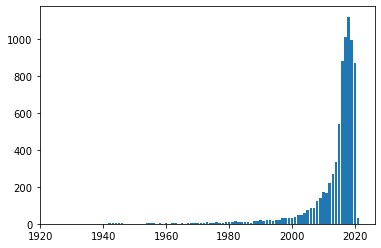

In [11]:
# use plt.bar to plot the bar chart
plt.bar(q1.index, q1)
plt.show()

As we can see above, the highest number of TV shows and movies seem to be released just in the past decade, so we will take from 2010 to 2020 as the boundary for xlim.

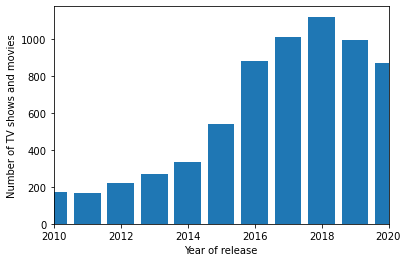

In [12]:
plt.bar(q1.index, q1)
plt.xlim(2010, 2020)
plt.xlabel("Year of release")
plt.ylabel("Number of TV shows and movies")
plt.show()

#### Answer: 
The number of TV shows and movies were released in 2018 is the highest.

### Question 2: How many TV shows and Movies are in the dataset?

In [13]:
# use value_count() to get the frequency for each category
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

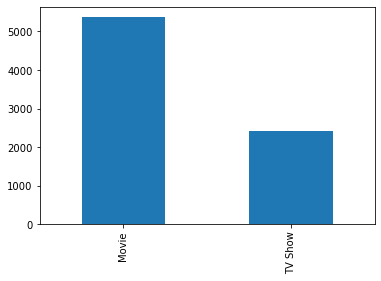

In [14]:
# Plot the bar chart
df['type'].value_counts().plot(kind='bar');

#### Answer:
There are 5377 movies and 2410 TV shows in the dataset.

### Question 3: Show top 3 Directors, who gave the highest number of TV shows and movies?
The logic of the answer for this question is the same as the one for question 2 and we ignore the 'unknown' director.

In [15]:
df['director'].value_counts()

unknown                                       2389
Raúl Campos, Jan Suter                          18
Marcus Raboy                                    16
Jay Karas                                       14
Cathy Garcia-Molina                             13
                                              ... 
Quek Shio-chuan                                  1
Marianna Palka                                   1
Dustin McKenzie, Andrew Duncan, Audu Paden       1
Eddie Rosas                                      1
Raaghav Dar                                      1
Name: director, Length: 4050, dtype: int64

#### Answer: 
They are 
- Raúl Campos, Jan Suter
- Marcus Raboy
- Jay Karas  

### Question 4: Show top 3 countries, which were released the most movies in 2018

In [16]:
# firstly, get the dataframe which type is movie and release_year is 2018
df[(df['type']=='Movie') & (df['release_year']==2018)]

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description
13,s14,Movie,"2,215",Nottapon Boonprakob,Artiwara Kongmalai,Thailand,2018,TV-MA,89 min,"Documentaries, International Movies, Sports Mo...",This intimate documentary follows rock star Ar...
17,s18,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States",2018,R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ..."
20,s21,Movie,​​Kuch Bheege Alfaaz,Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,2018,TV-14,110 min,"Dramas, Independent Movies, International Movies",After accidentally connecting over the Interne...
21,s22,Movie,​Goli Soda 2,Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,2018,TV-14,128 min,"Action & Adventure, Dramas, International Movies","A taxi driver, a gangster and an athlete strug..."
31,s32,Movie,#FriendButMarried,Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,2018,TV-G,102 min,"Dramas, International Movies, Romantic Movies","Pining for his high school crush for years, a ..."
...,...,...,...,...,...,...,...,...,...,...,...
7751,s7752,Movie,Yucatán,Daniel Monzón,"Luis Tosar, Rodrigo de la Serna, Joan Pera, St...",Spain,2018,TV-MA,130 min,"Comedies, International Movies",Competing con artists attempt to creatively an...
7764,s7765,Movie,Zero,Aanand Rai,"Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...",India,2018,TV-14,159 min,"Comedies, Dramas, International Movies",Through his relationships with two wildly diff...
7765,s7766,Movie,Zero Hour,Robert O. Peters,"Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...",unknown,2018,TV-MA,89 min,"International Movies, Thrillers","After his father passes, the heir to a retail ..."
7771,s7772,Movie,Zion,Floyd Russ,Zion Clark,United States,2018,TV-PG,12 min,"Documentaries, Sports Movies",Born without legs and stuck in foster care for...


In [17]:
q4 = df[(df['type']=='Movie') & (df['release_year']==2018)]

In [18]:
q4['country'].value_counts().head(10)

United States     238
India              82
unknown            46
United Kingdom     25
Canada             25
Spain              24
Nigeria            14
Indonesia          13
Mexico             11
Japan              11
Name: country, dtype: int64

#### Answer:
We ignore 'unknown', those countries are United States, India, United Kingdom, and Canada (UK and Canada have the same number of movies).

### Question 5: In how many movies/shows, Tom Cruise was cast?

In [22]:
# use str.contains() 
df[df['cast'].str.contains('Tom Cruise')]

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,1999,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and..."
5070,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,1988,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...


#### Answer: 
There are 2 movies in which Tom Cruise was cast. They are "Magnolia" and "Rain Man".